# Dimensionality reduction techniques

## Principal component analysis (PCA)

Principal component analysis (PCA) is a widely used method for examining extensive datasets that encompass numerous dimensions or features for each observation. It enhances the comprehensibility of the data by retaining as much information as possible and facilitates the graphical representation of data with multiple dimensions.

Why apply PCA to this dataset?

Regarding the provided dataset, it appears to contain data related to fertilizer consumption as a percentage of fertilizer production. If you apply PCA to this dataset, it would aim to reduce the complexity by condensing the number of features while maintaining the essence of the information contained within. This process could reveal underlying patterns or relationships in fertilizer consumption trends relative to production, potentially making it easier to interpret and visualize the data, especially if the original dataset has many variables or is over a long time period.

In [14]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [8]:
# Load the dataset
df = pd.read_csv('/content/Fertilizer consumption (% of fertilizer production).csv')

In [9]:
# Inspect the DataFrame to find non-numeric columns
print(df.head())  # Look at the first few rows of the DataFrame

# Convert columns with dates to datetime if they're meant to be kept as features
# If not, drop those columns
# Here, I'm assuming that columns with dates are not features for PCA
df = df.select_dtypes(include=[np.number])  # This will select only numeric columns



         Data Source World Development Indicators  \
0                NaN                          NaN   
1  Last Updated Date                   10/28/2021   
2                NaN                          NaN   
3       Country Name                 Country Code   
4              Aruba                          ABW   

                                          Unnamed: 2         Unnamed: 3  \
0                                                NaN                NaN   
1                                                NaN                NaN   
2                                                NaN                NaN   
3                                     Indicator Name     Indicator Code   
4  Fertilizer consumption (% of fertilizer produc...  AG.CON.FERT.PT.ZS   

   Unnamed: 4  Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  \
0         NaN         NaN         NaN         NaN         NaN         NaN   
1         NaN         NaN         NaN         NaN         NaN         NaN   

In [10]:
# Inspect the DataFrame to find non-numeric columns
print(df.head())  # Look at the first few rows of the DataFrame

# Convert columns with dates to datetime if they're meant to be kept as features
# If not, drop those columns
# Here, I'm assuming that columns with dates are not features for PCA
df = df.select_dtypes(include=[np.number])  # This will select only numeric columns

# Now, let's deal with missing values in a numeric way
df = df.fillna(df.mean())

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

   Unnamed: 4  Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  \
0         NaN         NaN         NaN         NaN         NaN         NaN   
1         NaN         NaN         NaN         NaN         NaN         NaN   
2         NaN         NaN         NaN         NaN         NaN         NaN   
3      1960.0      1961.0      1962.0      1963.0      1964.0      1965.0   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   Unnamed: 10  Unnamed: 11  Unnamed: 12  Unnamed: 13  ...  Unnamed: 55  \
0          NaN          NaN          NaN          NaN  ...          NaN   
1          NaN          NaN          NaN          NaN  ...          NaN   
2          NaN          NaN          NaN          NaN  ...          NaN   
3       1966.0       1967.0       1968.0       1969.0  ...       2011.0   
4          NaN          NaN          NaN          NaN  ...          NaN   

   Unnamed: 56  Unnamed: 57  Unnamed: 58  Unnamed: 59  Unnamed: 60  \
0          NaN  

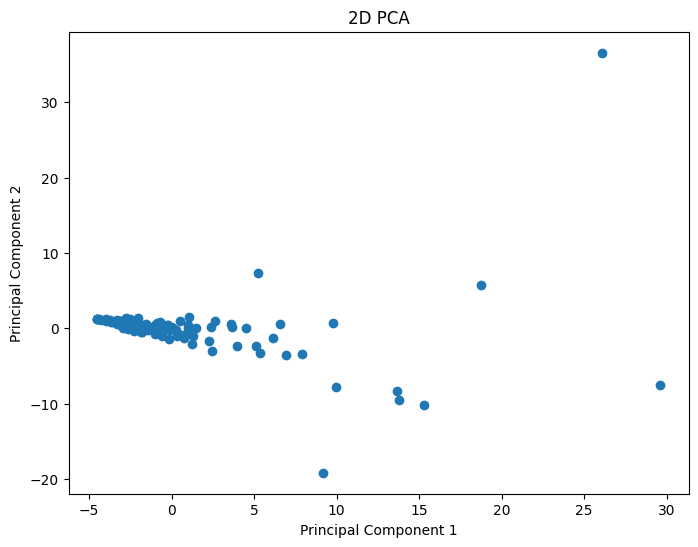

Explained variation per principal component: [0.2408917  0.14636927]


In [11]:
# Apply PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_scaled)
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])

# Visualize the results
plt.figure(figsize=(8,6))
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA')
plt.show()

# Display the variance explained by each component
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))


Plotting 3D graph

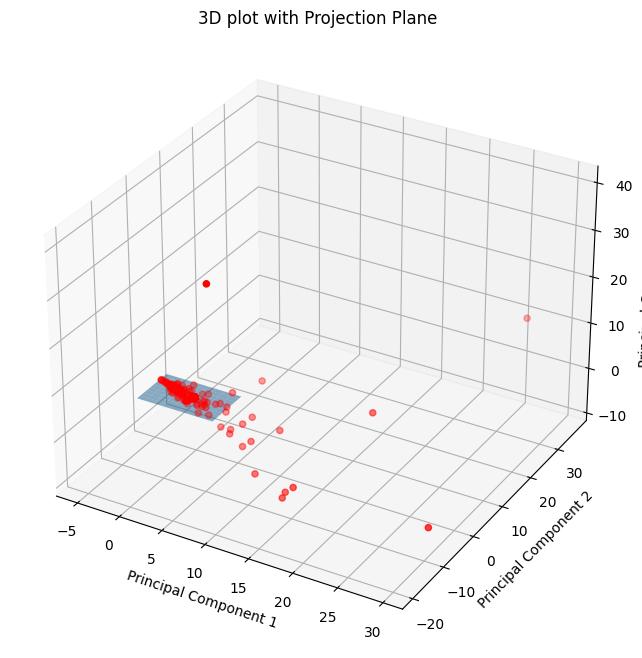

In [15]:
# We also need to handle any potential missing numeric values.
df_numeric = df.select_dtypes(include=[np.number]).fillna(df.mean())

# Standardize the data before applying PCA
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Apply PCA with 3 components to be able to plot in 3D
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(df_scaled)

# Create a DataFrame with the principal components
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2', 'PC3'])

# Now we plot the 3D dataset with the projection plane.
# The projection plane will be the plane formed by the first two principal components.

# Create a new figure for the 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the data points
ax.scatter(principalDf['PC1'], principalDf['PC2'], principalDf['PC3'], c='r', marker='o')

# Create a meshgrid of the x & y values to plot the plane
xx, yy = np.meshgrid(range(-5, 5), range(-5, 5))
zz = np.zeros(xx.shape)

# Plot the plane by setting the z-component to 0, which corresponds to PC3 in our case
ax.plot_surface(xx, yy, zz, alpha=0.5)

# Labels and title
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D plot with Projection Plane')

# Show the plot
plt.show()



## Singular Value Decomposition (SVD)

SVD has several applications in statistics and computational fields, including:

Signal processing.

Solving systems of linear equations.

Matrix approximation, where a matrix is approximated by a matrix of lower rank, useful in noise reduction and data compression.

Principal Component Analysis (PCA), where SVD is used to compute the principal components of a dataset.

Recommender systems, for example, in the construction of collaborative filtering algorithms.

In [16]:
import pandas as pd
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [18]:
df = pd.read_csv('/content/Spotify-2000.csv')


In [19]:
# Drop non-numeric columns for simplicity
numeric_df = df.select_dtypes(include=[np.number])

# Handle missing values, if any
numeric_df.fillna(numeric_df.mean(), inplace=True)

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(numeric_df)


In [20]:
svd = TruncatedSVD(n_components=3)  # Using 3 components for 3D visualization
svd_result = svd.fit_transform(df_scaled)


Visualise in 2D:

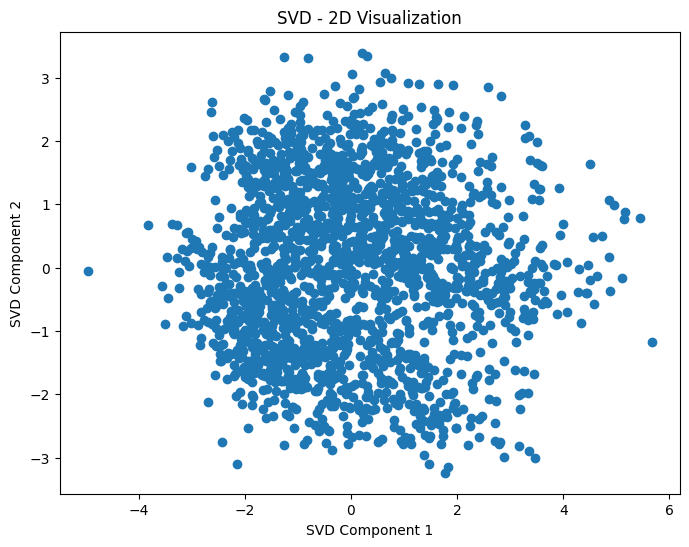

In [21]:
plt.figure(figsize=(8, 6))
plt.scatter(svd_result[:, 0], svd_result[:, 1])
plt.xlabel('SVD Component 1')
plt.ylabel('SVD Component 2')
plt.title('SVD - 2D Visualization')
plt.show()


Visualise in 3D:

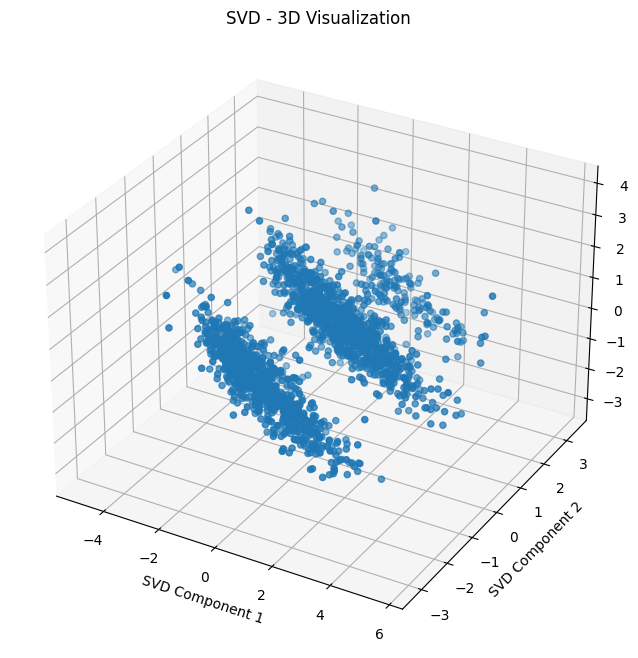

In [22]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(svd_result[:, 0], svd_result[:, 1], svd_result[:, 2])
ax.set_xlabel('SVD Component 1')
ax.set_ylabel('SVD Component 2')
ax.set_zlabel('SVD Component 3')
ax.set_title('SVD - 3D Visualization')
plt.show()


Variance Explained:


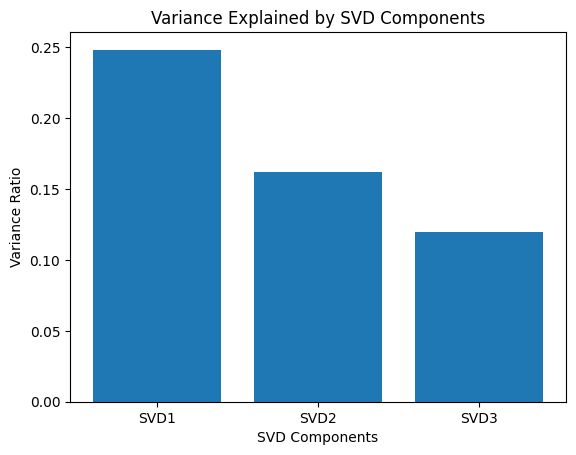

In [23]:
plt.bar(['SVD1', 'SVD2', 'SVD3'], svd.explained_variance_ratio_)
plt.xlabel('SVD Components')
plt.ylabel('Variance Ratio')
plt.title('Variance Explained by SVD Components')
plt.show()


## Multidimensional Scaling (MDS)

Multidimensional Scaling (MDS) is a technique used in data mining and statistics to visualize the level of similarity or dissimilarity of individual cases of a dataset. The primary goal of MDS is to translate "distances" or "dissimilarities" among objects into a geometric space, typically of lower dimensionality, where these relationships can be more easily visualized and analyzed. This is especially useful in exploratory data analysis and for making patterns in the data more apparent.

**Types of MDS:**

Classical MDS: Assumes the dissimilarities are Euclidean and focuses on preserving the actual distances between points.

Non-metric MDS: Only tries to preserve the order of the distances, making it useful when the dissimilarities are ordinal.

Visualization: The output of MDS is a set of coordinates in a lower-dimensional space, which can then be plotted. The relative distances in this plot aim to reflect as closely as possible the dissimilarities in the original high-dimensional space.

Applications: MDS is used in various fields, such as psychology, marketing, and other social sciences, to analyze similarities or preferences, in bioinformatics for genetic and protein similarity analysis, and in information science for document or website similarity.

Interpretation: The interpretation of an MDS plot is in terms of proximity: points that are close together are similar, and points that are far apart are dissimilar. However, the absolute positions of points in the MDS plot are not informative by themselves.

In [25]:
import pandas as pd
import numpy as np
from sklearn.manifold import MDS
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [27]:
df = pd.read_csv('/content/wine-clustering.csv')


In [28]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)


Apply MDS:

In [30]:
# 2D MDS with normalized_stress explicitly set
mds_2d = MDS(n_components=2, normalized_stress='auto')  # or normalized_stress=False for current behavior
mds_result_2d = mds_2d.fit_transform(df_scaled)

# 3D MDS with normalized_stress explicitly set
mds_3d = MDS(n_components=3, normalized_stress='auto')  # or normalized_stress=False for current behavior
mds_result_3d = mds_3d.fit_transform(df_scaled)



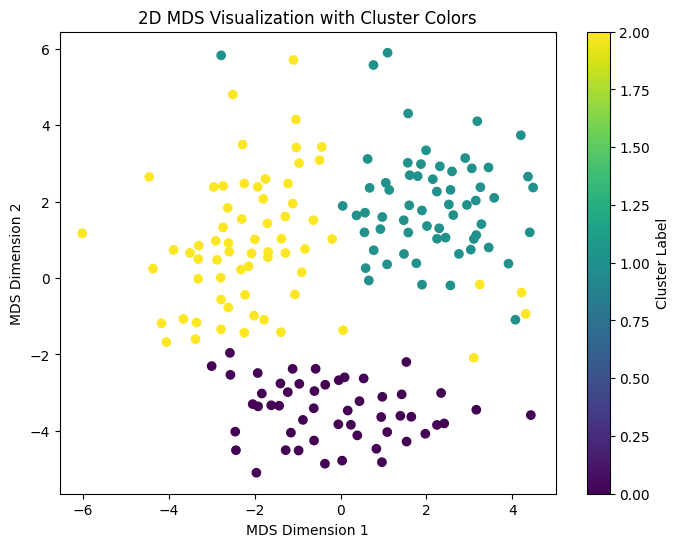

In [39]:
# 2D Visualization with Cluster Colors
plt.figure(figsize=(8, 6))
plt.scatter(mds_result_2d[:, 0], mds_result_2d[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.title('2D MDS Visualization with Cluster Colors')
plt.colorbar(label='Cluster Label')
plt.show()


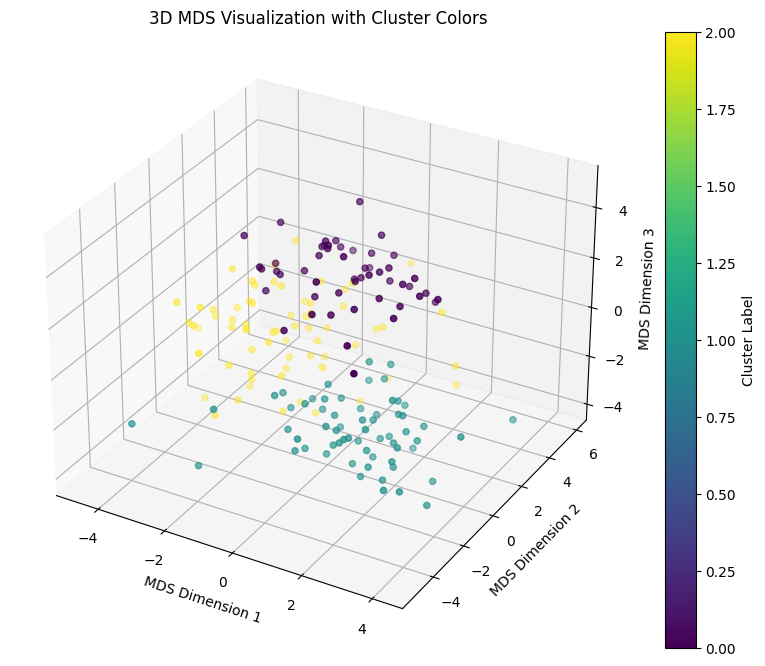

In [38]:
# 3D Visualization with Cluster Colors
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(mds_result_3d[:, 0], mds_result_3d[:, 1], mds_result_3d[:, 2], c=cluster_labels, cmap='viridis')
ax.set_xlabel('MDS Dimension 1')
ax.set_ylabel('MDS Dimension 2')
ax.set_zlabel('MDS Dimension 3')
ax.set_title('3D MDS Visualization with Cluster Colors')
fig.colorbar(scatter, ax=ax, label='Cluster Label')
plt.show()


##  Isometric mapping (ISOMAP)

<ipython-input-8-140cd8a12be1>:26: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(isomap_data[:, 0], isomap_data[:, 1], cmap=plt.cm.Spectral)


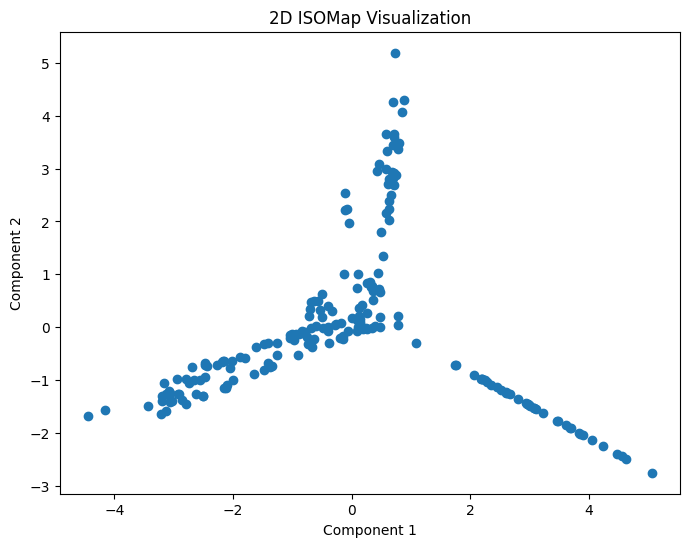

In [8]:
import pandas as pd
from sklearn.manifold import Isomap
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load your dataset (make sure to upload it to Colab or access it from your drive)
df = pd.read_csv('/content/Mall_Customers.csv')  # Update the path to your dataset

# Selecting numerical columns for ISOMap
numeric_columns = df.select_dtypes(include='number').columns.tolist()
numeric_data = df[numeric_columns]

# Standardizing the data
scaler = StandardScaler()
numeric_data_scaled = scaler.fit_transform(numeric_data)

# Performing ISOMap
n_components = 3  # Number of components for ISOMap
n_neighbors = 5   # Number of neighbors
isomap = Isomap(n_components=n_components, n_neighbors=n_neighbors)
isomap_data = isomap.fit_transform(numeric_data_scaled)

# ISOMap 2D Visualization
plt.figure(figsize=(8, 6))
plt.scatter(isomap_data[:, 0], isomap_data[:, 1], cmap=plt.cm.Spectral)
plt.title('2D ISOMap Visualization')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()



<ipython-input-7-4a20ee00c2f7>:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(isomap_data[:, 0], isomap_data[:, 1], isomap_data[:, 2], cmap=plt.cm.Spectral)


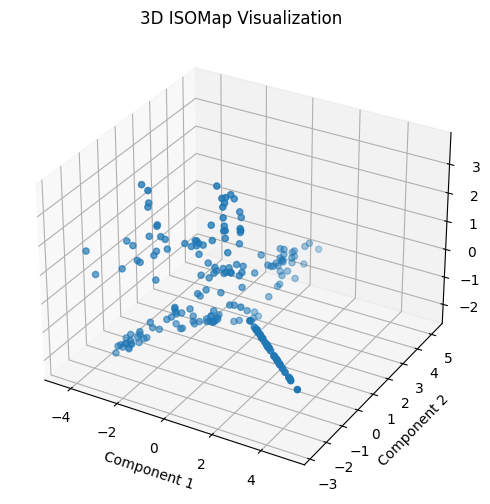

In [7]:
# ISOMap 3D Visualization
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(isomap_data[:, 0], isomap_data[:, 1], isomap_data[:, 2], cmap=plt.cm.Spectral)
ax.set_title('3D ISOMap Visualization')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
plt.show()


## Locally Linear Embedding (LLE)

<ipython-input-20-66ef5e2b46e0>:31: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(lle_data[:, 0], lle_data[:, 1], c='blue', cmap=plt.cm.Spectral)


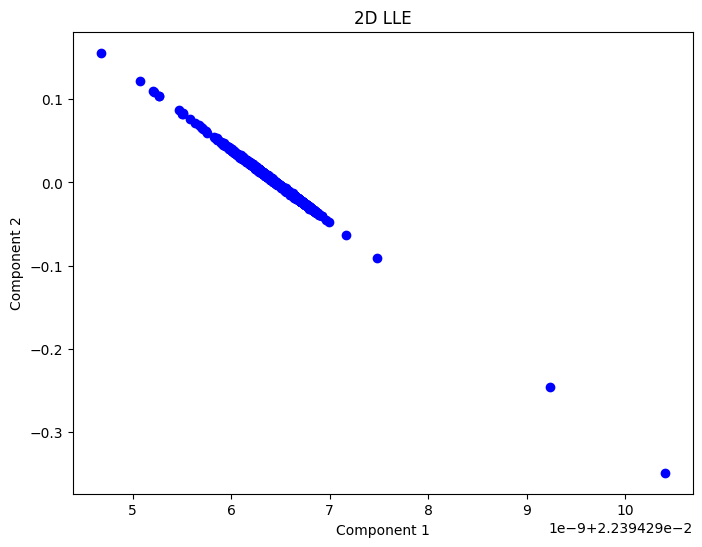

In [20]:
import pandas as pd
import numpy as np
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Replace 'your_data.csv' with your dataset file
# Make sure to upload the file to Google Colab or access it from your drive
df = pd.read_csv('/content/Spotify-2000.csv')

# Select numerical columns for LLE (modify this as per your dataset)
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
numeric_data = df[numeric_columns]

# Handling missing values
numeric_data_filled = numeric_data.fillna(numeric_data.mean())

# Standardizing the data
scaler = StandardScaler()
numeric_data_scaled = scaler.fit_transform(numeric_data_filled)

# Performing LLE
n_components = 3  # Number of components for LLE
n_neighbors = 10  # Number of neighbors
lle = LocallyLinearEmbedding(n_components=n_components, n_neighbors=n_neighbors)
lle_data = lle.fit_transform(numeric_data_scaled)

# 2D Visualization
plt.figure(figsize=(8, 6))
plt.scatter(lle_data[:, 0], lle_data[:, 1], c='blue', cmap=plt.cm.Spectral)
plt.title('2D LLE')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()



<ipython-input-19-5a59f3ab00fd>:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(lle_data[:, 0], lle_data[:, 1], lle_data[:, 2], c='green', cmap=plt.cm.Spectral)


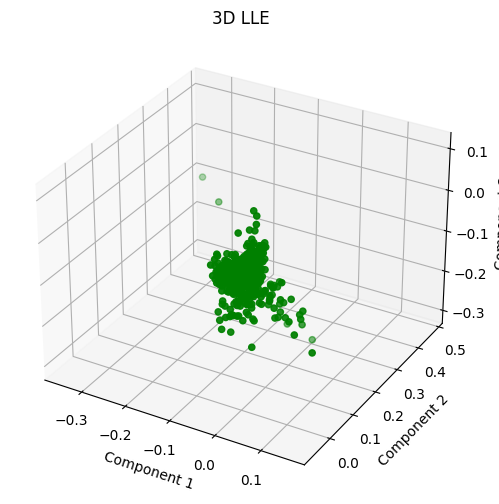

In [19]:
# 3D Visualization
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(lle_data[:, 0], lle_data[:, 1], lle_data[:, 2], c='green', cmap=plt.cm.Spectral)
ax.set_title('3D LLE')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
plt.show()


## Uniform Manifold Approximation and Projection (UMAP)

In [2]:
!pip install umap-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 6.5 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=37ea8e56750fb7182142d658727f17b45ae7fb634458bc50d5fe48749b8d6c7c
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages/scipy

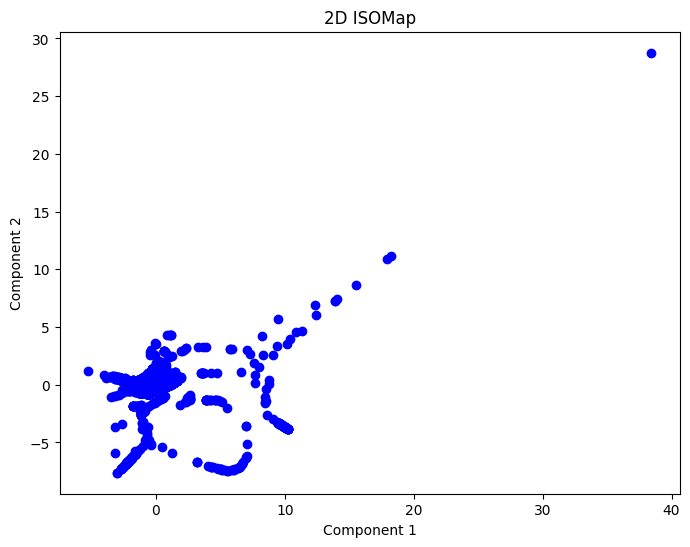

<ipython-input-3-c3d8326dd4c6>:42: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(isomap_data[:, 0], isomap_data[:, 1], isomap_data[:, 2], c='green', cmap=plt.cm.Spectral)


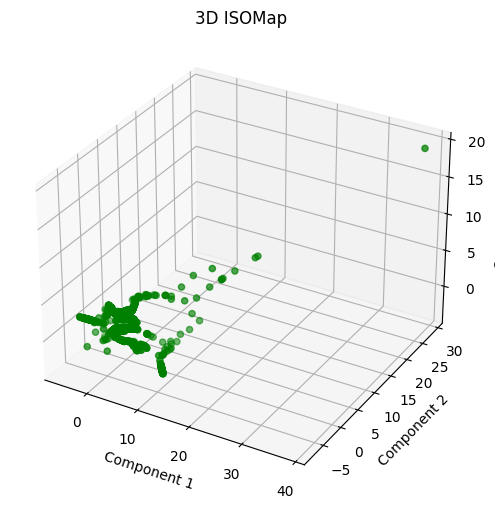

<ipython-input-3-c3d8326dd4c6>:51: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(umap_data[:, 0], umap_data[:, 1], c='red', cmap=plt.cm.Spectral)


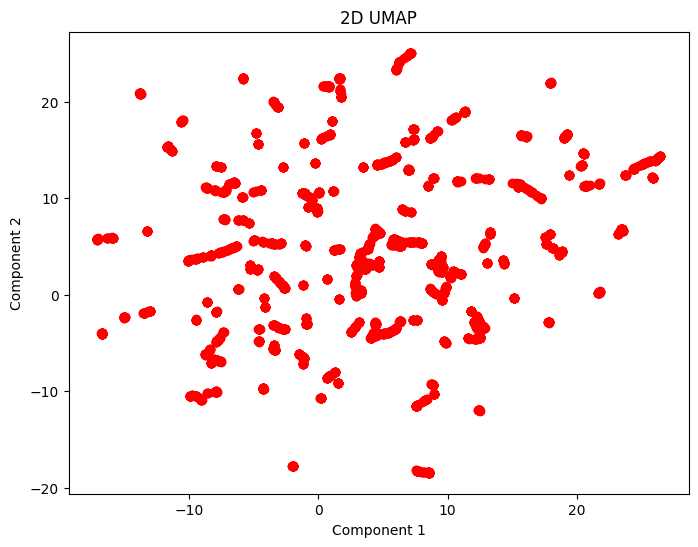

<ipython-input-3-c3d8326dd4c6>:60: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(umap_data[:, 0], umap_data[:, 1], umap_data[:, 2], c='purple', cmap=plt.cm.Spectral)


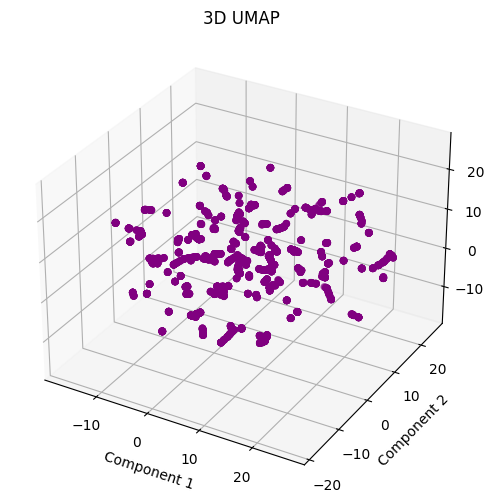

In [3]:
import pandas as pd
import numpy as np
from sklearn.manifold import Isomap
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import umap

# Load your dataset
df = pd.read_csv('/content/ds_salaries.csv')  # Update the path to your dataset

# Select numerical columns for analysis
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
numeric_data = df[numeric_columns]

# Handling missing values
numeric_data_filled = numeric_data.fillna(numeric_data.mean())

# Standardizing the data
scaler = StandardScaler()
numeric_data_scaled = scaler.fit_transform(numeric_data_filled)

# Performing ISOMap
isomap = Isomap(n_components=3, n_neighbors=5)
isomap_data = isomap.fit_transform(numeric_data_scaled)

# Performing UMAP
umap_model = umap.UMAP(n_components=3, random_state=42)
umap_data = umap_model.fit_transform(numeric_data_scaled)

# ISOMap 2D Visualization
plt.figure(figsize=(8, 6))
plt.scatter(isomap_data[:, 0], isomap_data[:, 1], c='blue', cmap=plt.cm.Spectral)
plt.title('2D ISOMap')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

# ISOMap 3D Visualization
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(isomap_data[:, 0], isomap_data[:, 1], isomap_data[:, 2], c='green', cmap=plt.cm.Spectral)
ax.set_title('3D ISOMap')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
plt.show()

# UMAP 2D Visualization
plt.figure(figsize=(8, 6))
plt.scatter(umap_data[:, 0], umap_data[:, 1], c='red', cmap=plt.cm.Spectral)
plt.title('2D UMAP')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()


